In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
%matplotlib inline
import scipy.stats as stats
import statsmodels as sm
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

# Data Load In 

In [2]:
import Scripts_SigNonSig_V2
reload(Scripts_SigNonSig_V2)
from Scripts_SigNonSig_V2 import * 

In [4]:
out = get_data_for_sig_nonsig_analyses(version='v8b')
df_50 = out['df_50']

Scripts_SigNonSig_V2.py:118: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_simple_one_region = data_simple_one_region[np.logical_not(np.isnan(df.loc[:,'Accuracy.50']))]
Scripts_SigNonSig_V2.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  region_data_single_row['Accuracy.50'] = np.mean(region_data['Accuracy.50'])


# Select Just Rule Studies




In [5]:
print(len(df_50))
df_50 = df_50.loc[df_50['Info.type']=='Rule',:]
print(len(df_50))

891
311


In [5]:
# these are ones I thought later, I may have mis-classified as rule. 
#df_50 = df_50.loc[df_50['PID']!=24,:]
#df_50 = df_50.loc[df_50['PID']!=31,:]
#df_50 = df_50.loc[df_50['PID']!=47,:]
#df_50 = df_50.loc[df_50['PID']!=35,:]
#df_50 = df_50.loc[df_50['PID']!=44,:]
#df_50 = df_50.loc[df_50['PID']!=79,:]
#print(len(df_50))

# Boot-Strap Both Distributions

In [6]:
import Scripts_Hierarchical_Boot_V2
reload(Scripts_Hierarchical_Boot_V2)
from Scripts_Hierarchical_Boot_V2 import * 

/Users/chris/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
hierarchical_boot(df_50,savetitle='rule_v8b',save=True)


{'mean': array([ 0.59059091,  0.57906855,  0.58062727, ...,  0.58027669,
         0.59564675,  0.58729187]),
 'perc95': array([ 0.71  ,  0.71  ,  0.7325, ...,  0.741 ,  0.72  ,  0.71  ])}

# Load Back In 

In [8]:
boot_results = np.load('../data_meta_analysis/data_derived_meta_analysis/bootstrap_results_rule_v8b.npz')

In [9]:
x = np.linspace(0,1,100) # what range for cdf # 
epcdf_store = boot_results['epcdf_store']
eppdf_store = boot_results['eppdf_store']
meann = boot_results['meann']
mediann = boot_results['mediann']
meann_study=boot_results['meann_study']
prob_less_than_62 = boot_results['prob_less_than_62']
perc95 = boot_results['perc95']
mean_max = boot_results['mean_max']


# CDF and PDF Plots 

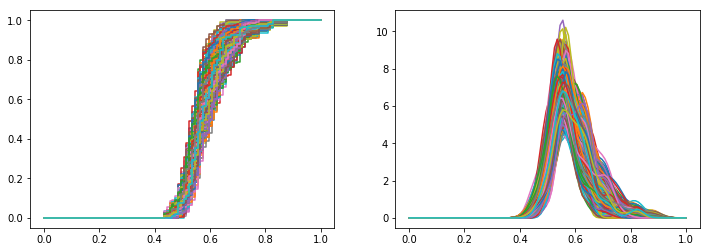

In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.step(x, epcdf_store.T);
ax2.plot(x, eppdf_store.T);


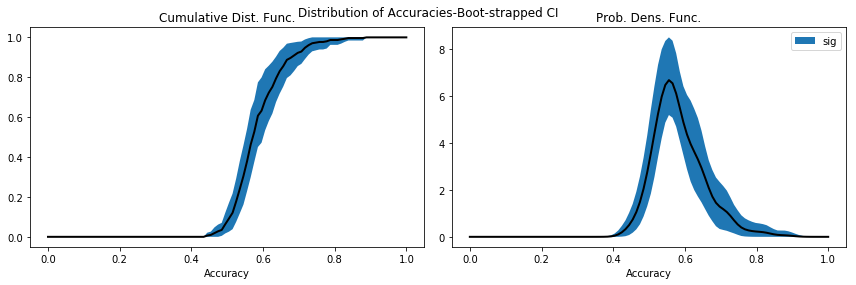

In [11]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))

# cdf
upci = np.percentile(epcdf_store,97.5,axis=0)
loci = np.percentile(epcdf_store,2.5,axis=0)
ax1.plot(x,np.mean(epcdf_store,axis=0),linewidth=2,color='black')
ax1.fill_between(x,upci,loci)

##### PDF 

# significant 
upci = np.percentile(eppdf_store,97.5,axis=0)
loci = np.percentile(eppdf_store,2.5,axis=0)
ax2.plot(x,np.mean(eppdf_store,axis=0),linewidth=2,color='black')
ax2.fill_between(x,upci,loci,label='sig')


ax1.set_title('Cumulative Dist. Func.')
ax2.set_title('Prob. Dens. Func.')

ax1.set_xlabel('Accuracy')
ax2.set_xlabel('Accuracy')
plt.legend()
plt.suptitle('Distribution of Accuracies-Boot-strapped CI',fontsize=12)
plt.tight_layout()
#plt.savefig('distributions_cdf_pdf_boot_all_data.png')


In [12]:
print('prob less than 62')
print(np.percentile(prob_less_than_62,95))
print(np.mean(prob_less_than_62))
print(np.percentile(prob_less_than_62,5))

print('mean')
print(np.percentile(meann,95))
print(np.mean(meann))
print(np.percentile(meann,5))
print(np.percentile(meann,95)-np.percentile(meann,5))

print('study mean mean')
print(np.percentile(meann_study,95))
print(np.mean(meann_study))
print(np.percentile(meann_study,5))
print(np.percentile(meann_study,95)-np.percentile(meann_study,5))

print('median')
print(np.percentile(mediann,95))
print(np.mean(mediann))
print(np.percentile(mediann,5))


print('perc95')
print(np.percentile(perc95,95))
print(np.mean(perc95))
print(np.percentile(perc95,5))

print('mean_maxes')
print(np.percentile(mean_max,95))
print(np.mean(mean_max))
print(np.percentile(mean_max,5))



prob less than 62
0.838933730469
0.722692249613
0.606247234513
mean
0.603888157308
0.584037402078
0.563637719005
0.0402504383032
study mean mean
0.586409111976
0.571683695763
0.558202409535
0.0282067024411
median
0.6
0.5712285
0.55
perc95
0.76505
0.711614975
0.66
mean_maxes
0.634888888889
0.612213430556
0.590111111111
